In [2]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
def excite_atoms(positions, states):
    for i in range(len(positions)):
        states[positions[i][0], positions[i][1]] = 1
    return

def random_seeds_displacement(N_atoms_per_row, N_seeds):
    seeds_positions = np.random.choice(range(N_atoms_per_row**2), N_seeds, replace=False)
    x_positions = [seeds_positions[i]//N_atoms_per_row for i in range(N_seeds)]
    y_positions = [seeds_positions[i]%N_atoms_per_row for i in range(N_seeds)]
    return x_positions, y_positions
        
def get_neighbourhood(excited_atom, N_atoms_per_row):
    neighbours = [
                (excited_atom[0]-1, excited_atom[1]), 
                (excited_atom[0]+1, excited_atom[1]),
                (excited_atom[0], excited_atom[1]-1), 
                (excited_atom[0], excited_atom[1]+1)
                ]
    for neighbour in neighbours.copy():
        if -1 in list(neighbour) or N_atoms_per_row in list(neighbour):
            neighbours.remove(neighbour)
    return neighbours



First we excite the seed on resonance, exctracting the number of them from a Poissonian with mean "mu_exct_on_resonance".

Then the iteration of the facilitation process starts. 

In [22]:
def simulation( 
            mu_exct_on_resonance,
            p_exct_OFF,
            p_spontaneus_decay,
            N_atoms_per_row,
            N_steps
            ):

    N_seeds = np.random.poisson(mu_exct_on_resonance) # extract from a poassonian the inital seeds
    x_excited, y_excited = random_seeds_displacement(N_atoms_per_row=N_atoms_per_row, N_seeds=N_seeds) # extract the random positions of the seeds
    excited_atoms = list(zip(x_excited, y_excited))

    for _ in range(N_steps):
        # first phase: check if the neighbours are already excited excite them with a certain probability.
        for excited_atom in excited_atoms.copy():
            neighbours = get_neighbourhood(excited_atom, N_atoms_per_row)
            for neighbour in neighbours:
                if neighbour not in excited_atoms and np.random.random()<p_exct_OFF:
                    excited_atoms.append(neighbour)
        # second phase: spontaneous decay of atoms.
        for excited_atom in excited_atoms.copy():
            if np.random.random()<p_spontaneus_decay:
                excited_atoms.remove(excited_atom)
        
        N_seeds = np.random.poisson(mu_exct_on_resonance) # extract from a poassonian the inital seeds
        x_excited, y_excited = random_seeds_displacement(N_atoms_per_row=N_atoms_per_row, N_seeds=N_seeds) # extract the random positions of the seeds
        excited_atoms = excited_atoms + list(zip(x_excited, y_excited))

    return excited_atoms

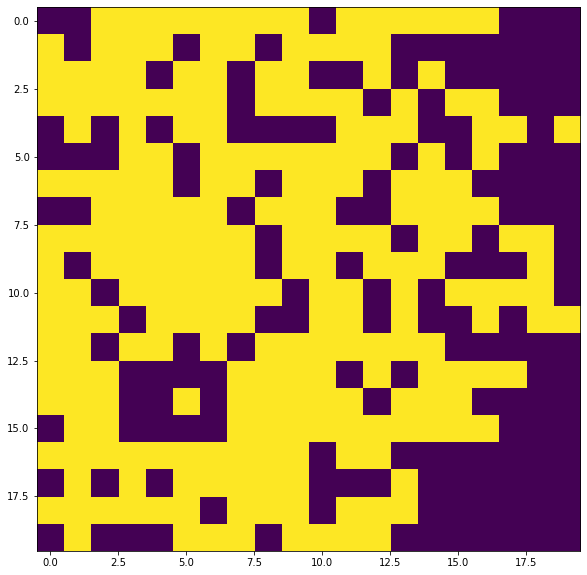

In [26]:
N_atoms_per_row = 20
mu_exct_on_resonance = 0.01
p_exct_OFF = 0.1
p_spontaneus_decay = 0.1
N_steps = 150

states = np.zeros([N_atoms_per_row, N_atoms_per_row])
excited_atoms = simulation(mu_exct_on_resonance, p_exct_OFF, p_spontaneus_decay, N_atoms_per_row, N_steps)
excite_atoms(excited_atoms, states)
plt.figure(figsize=(13,10))
plt.imshow(states)
plt.show()

next number of final atoms vs the probability of facilitation

In [5]:
N_points = 20
N_exp_per_point = 6
N_atoms_per_row = 100
mu_exct_on_resonance = 2
p_spontaneus_decay = 0.5
N_steps = 50
fac_probs = np.linspace(0,1, N_points)
N_final_atoms = np.zeros(N_points)
std_final_atoms = np.zeros(N_points)

for i, p_exct_OFF in enumerate(fac_probs):
    clear_output(wait=True)
    print(i/N_points*100, "%")
    ausiliar_array = np.zeros(N_exp_per_point)
    for j in range(N_exp_per_point):
        ausiliar_array[j] = len(simulation(mu_exct_on_resonance, p_exct_OFF, p_spontaneus_decay, N_atoms_per_row, N_steps))
    N_final_atoms[i] = np.mean(ausiliar_array)
    std_final_atoms[i] = np.std(ausiliar_array)

95.0 %


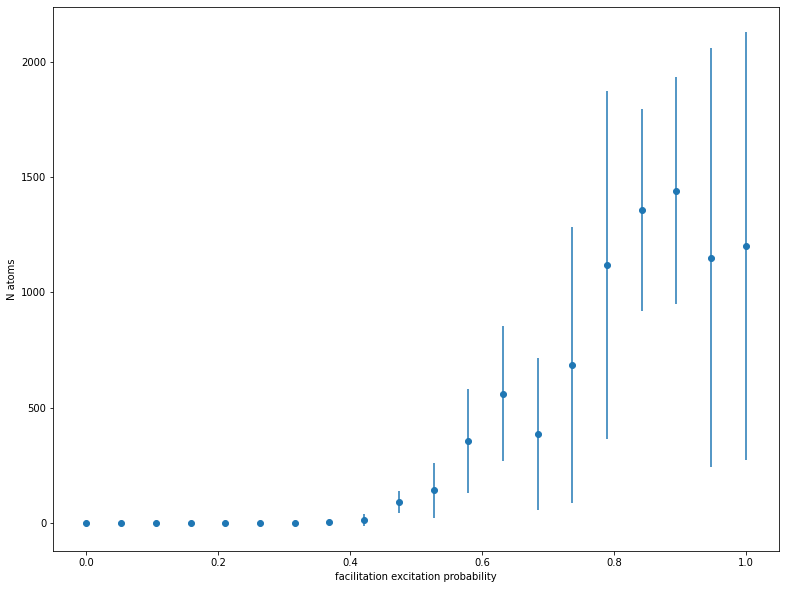

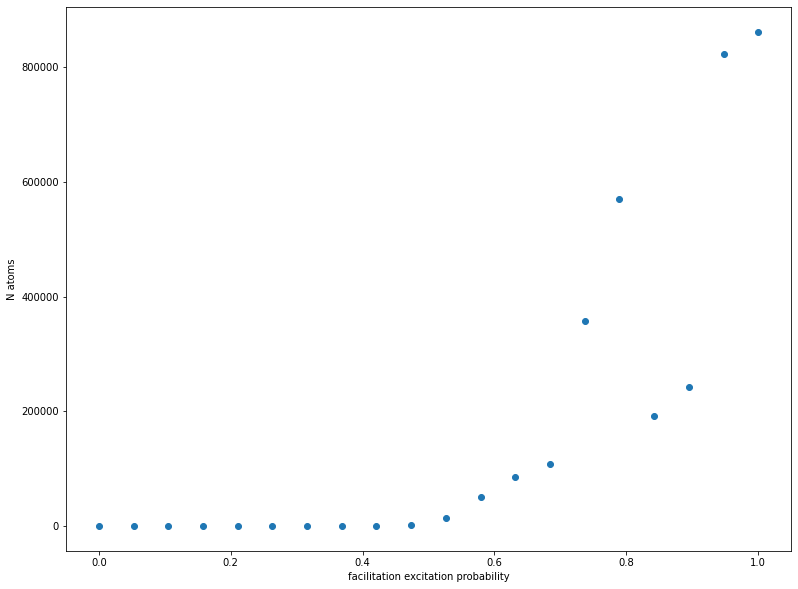

In [6]:
plt.figure(figsize=(13,10))
plt.errorbar(fac_probs, N_final_atoms, std_final_atoms, linestyle="", marker="o")
plt.xlabel("facilitation excitation probability")
plt.ylabel("N atoms")
plt.show()

plt.figure(figsize=(13,10))
plt.plot(fac_probs, std_final_atoms**2, linestyle="", marker="o")
plt.xlabel("facilitation excitation probability")
plt.ylabel("N atoms")
plt.show()

next the time evolution of the Q and number of excited atoms.

In [1]:
N_points = 20
jump = 10
N_exp_per_point = 50
N_atoms_per_row = 40
mu_exct_on_resonance = 0.01
p_spontaneus_decay = 0.1
fac_prob = 0.3
steps = np.arange(0,N_points*jump, step=jump)
N_final_atoms = np.zeros(N_points)
std_final_atoms = np.zeros(N_points)
Q_final_atoms = np.zeros(N_points)

for i, step in enumerate(steps):
    clear_output(wait=True)
    print(i/N_points*100, "%")
    ausiliar_array = np.zeros(N_exp_per_point)
    for j in range(N_exp_per_point):
        ausiliar_array[j] = len(simulation(mu_exct_on_resonance, fac_prob, p_spontaneus_decay, N_atoms_per_row, step))
    N_final_atoms[i] = np.mean(ausiliar_array)
    std_final_atoms[i] = np.std(ausiliar_array)
    Q_final_atoms[i] = std_final_atoms[i]**2/N_final_atoms[i]-1

NameError: name 'np' is not defined

In [2]:



fig, ax1 = plt.subplots()

plt.figure(figsize=(13,10))
 
color = 'tab:red'
ax1.set_xlabel('steps')
ax1.set_ylabel('Q', color = color)
ax1.plot(steps, Q_final_atoms, linestyle="", marker="o", color=color)
ax1.tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
 
color = 'tab:green'
ax2.set_ylabel('N', color = color)
ax2.errorbar(steps, N_final_atoms, std_final_atoms, linestyle="", marker="o", color=color)

ax2.tick_params(axis ='y', labelcolor = color)

plt.show()

NameError: name 'plt' is not defined